In [1]:
import pandas as pd
import numpy as np

In [2]:
airline = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [3]:
df1 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [4]:
df2 = pd.read_csv('Data/TradeInventories.csv',index_col='Date',parse_dates=True)

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 1997-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Inventories  264 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [8]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
df1.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [10]:
df2.index

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=264, freq=None)

In [11]:
airline.dropna(inplace=True)

In [12]:
df1.dropna(inplace=True)

In [13]:
df2.dropna(inplace=True)

In [14]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [16]:
df2.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


Matplotlib is building the font cache using fc-list. This may take a moment.


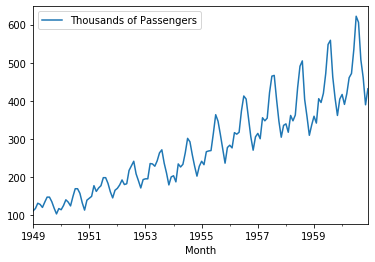

In [17]:
airline.plot();

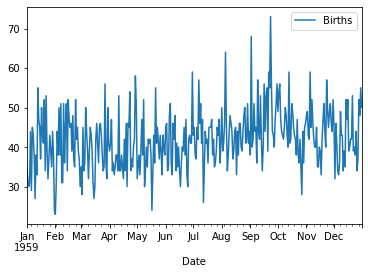

In [18]:
df1.plot();

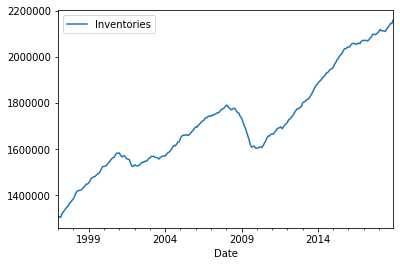

In [19]:
df2.plot()

# STEP ONE: ETS Decomposition

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

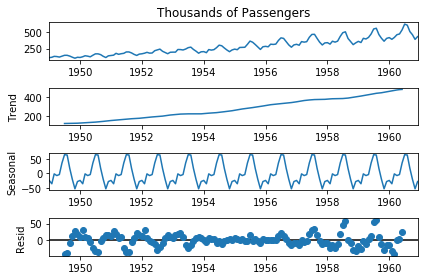

In [20]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='add')  # model='mul, add' also works
result.plot();

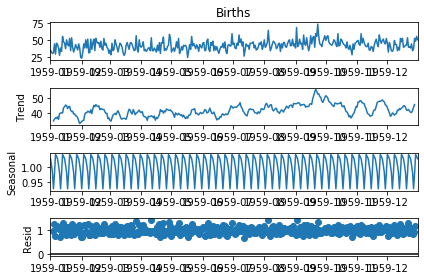

In [21]:
result = seasonal_decompose(df1['Births'], model='mul')  
result.plot();

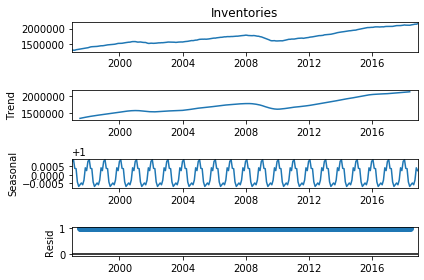

In [22]:
result = seasonal_decompose(df2['Inventories'], model='mul')  
result.plot();

# STEP TWO: Setting a DatetimeIndex Frequency

In [23]:
airline.index.freq = 'MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [24]:
df1.index.freq = 'D'
df1.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [25]:
df2.index.freq='MS'
df2.index

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=264, freq='MS')

* Goals
  * Compare a Holt-Winters forecasted model to known data
  * Understand <em>stationarity</em>, <em>differencing</em> and <em>lagging</em>
  * Introduce ARIMA and describe next steps

### Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>

### Differencing
#### First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.


### Lagging
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em>.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>

### Introduction to ARIMA Models
We'll investigate a variety of different forecasting models in upcoming sections, but they all stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> is explained in detail in the next section. Here we're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.

## ARMA models can be used on stationary datasets.

## For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.

### Granger Causality Tests

The Granger causality test is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This may indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, 𝑦
and 𝑥, the null hypothesis is that lagged values of 𝑥 do not explain variations in 𝑦.
In other words, it assumes that 𝑥𝑡 doesn’t Granger-cause 𝑦𝑡

.

The stattools grangercausalitytests function offers four tests for granger non-causality of 2 timeseries

In [26]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [53]:
#grangercausalitytests(df3[['a','d']],maxlag=3);

### Essentially we're looking for extremely low p-values (< 0.05) for Granger Causality, which we see at lag 2.

In [27]:
from statsmodels.tsa.stattools import ccovf,ccf,periodogram

In [28]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In this section we'll learn how to determine if a time series is stationary, if it's independent, and if two series demonstrate correlation and/or causality.

# STEP THREE: Automate the augmented Dickey-Fuller Test

### Function for running the augmented Dickey-Fuller test

In [29]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [30]:
adf_test(airline['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [31]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [32]:
adf_test(df2['Inventories'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.087684
p-value                   0.950652
# lags used               5.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# STEP FOUR: Choosing ARMA/ARIMA/SARIMA Orders using pmdarima Auto-ARIMA

In [34]:
from pmdarima import auto_arima

In [35]:
auto_arima(airline['Thousands of Passengers'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [36]:
#if data is non-stationary then put seasonal=True and seasonal period m=12 based on data. 
auto_arima(airline['Thousands of Passengers'],seasonal=True,m=12, start_p=1, start_q=1,
                          max_p=6, max_q=6,
                          start_P=0,error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.921
Date:                            Tue, 16 Jun 2020   AIC                           1015.842
Time:                                    17:20:16   BIC                           1033.093
Sample:                                         0   HQIC                          1022.852
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.033      0.011      0.991      -0.063       0.064
ma.L1         -0.4259      0.068     -6.226      0.000      -0.560      -0.292
ar.S.L12       0.6682      0.159      4.204      0.000       0.357       0.980
ar.S.L24       0.3302      0.096      3.455      0.001       0.143       0.517
ma.S.L12      -0.9734      1.189     -0.819      0.413      -3.303       1.356
sigma2       111.0288    108.985      1.019      0.308    -102.578     324.635
===================================================================================
Ljung-Box (Q):                       52.94   Jarque-Bera (JB):                 7.41
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.82   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
auto_arima(df1['Births'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [38]:
#if data is stationary then put seasonal=False
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Tue, 16 Jun 2020   AIC                           2460.154
Time:                        17:21:09   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 16 Jun 2020   AIC                           5348.037
Time:                        17:21:18   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# STEP FIVE: Split the data into train/test sets

## As a general rule you should set the length of your test set equal to your intended forecast size. 

In [40]:
train_airline = airline.iloc[:len(airline)-12]
test_airline = airline.iloc[len(airline)-12:]

In [41]:
# Set one month for testing
train = df1.iloc[:90]
test = df1.iloc[90:]

In [42]:
len(df2)

264

In [43]:
# Set one year for testing
train2 = df2.iloc[:252]
test2 = df2.iloc[252:]

# STEP SIX: Fit a Model

In [44]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
model_airline = SARIMAX(train_airline['Thousands of Passengers'],order=(3,1,3),seasonal_order=(1,1,1,12))
results_airline = model_airline.fit()
results_airline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -442.081
Date:                              Tue, 16 Jun 2020   AIC                            902.162
Time:                                      17:22:08   BIC                            927.174
Sample:                                  01-01-1949   HQIC                           912.319
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2676      0.342      0.782      0.434      -0.403       0.938
ar.L2         -0.1135      0.295     -0.385      0.701      -0.692       0.465
ar.L3          0.4278      0.267      1.603      0.109      -0.095       0.951
ma.L1         -0.5224      0.322     -1.622      0.105      -1.154       0.109
ma.L2          0.2691      0.282      0.953      0.341      -0.285       0.823
ma.L3         -0.6853      0.232     -2.955      0.003      -1.140      -0.231
ar.S.L12      -0.9164      0.222     -4.130      0.000      -1.351      -0.481
ma.S.L12       0.8308      0.310      2.679      0.007       0.223       1.439
sigma2        95.6997     10.974      8.720      0.000      74.190     117.209
===================================================================================
Ljung-Box (Q):                       35.54   Jarque-Bera (JB):                 5.36
Prob(Q):                              0.67   Prob(JB):                         0.07
Heteroskedasticity (H):               1.45   Skew:                            -0.20
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model = ARMA(train['Births'],order=(2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Tue, 16 Jun 2020   AIC                            627.809
Time:                        17:22:27   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [47]:
model2 = ARIMA(train2['Inventories'],order=(1,1,1))
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Tue, 16 Jun 2020   AIC                           4980.790
Time:                        17:22:34   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5698   1344.866      2.378      0.017     561.681    5833.459
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

# STEP SEVEN: Obtain a month's worth of predicted values

In [48]:
start_airline=len(train_airline)
end_airline=len(train_airline)+len(test_airline)-1
predictions_airline = results_airline.predict(start=start_airline, end=end_airline, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')

In [49]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

In [50]:
# Obtain predicted values
start=len(train2)
end=len(train2)+len(test2)-1
predictions2 = results2.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

### Plot predictions against known values

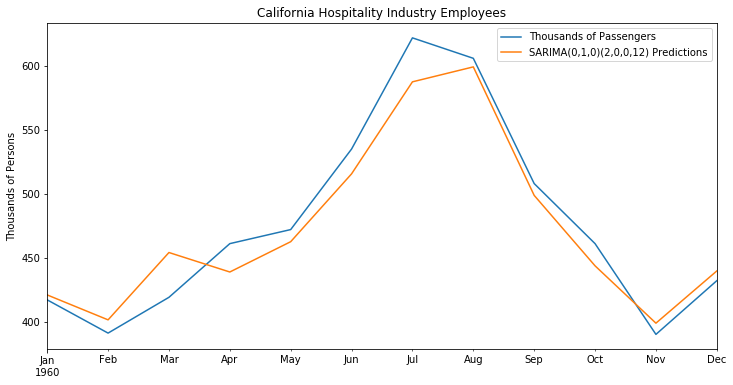

In [51]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test_airline['Thousands of Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions_airline.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

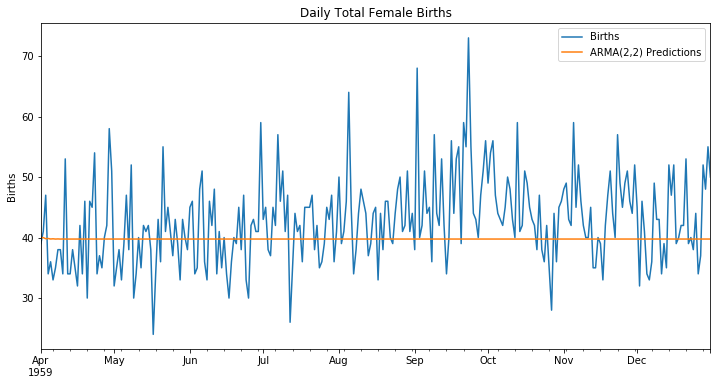

In [146]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' # we don't really need a label here

ax = test['Births'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Since our starting dataset exhibited no trend or seasonal component, this prediction makes sense. In the next section we'll take additional steps to evaluate the performance of our predictions, and forecast into the future.

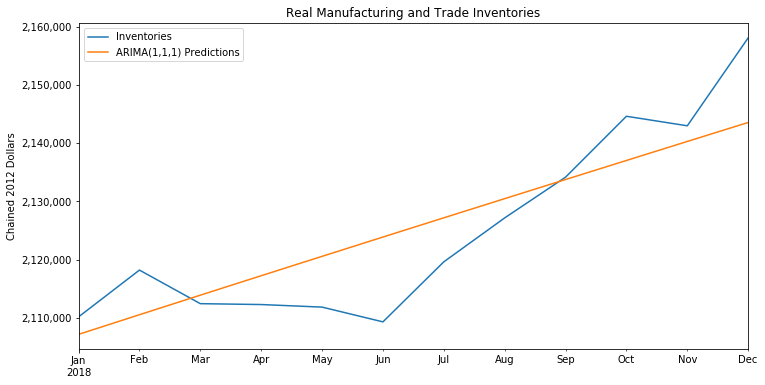

In [52]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = test2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions2.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

# STEP EIGHT: Evaluation Metrics

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [54]:
airline.columns

Index(['Thousands of Passengers'], dtype='object')

In [55]:
error1 = mean_squared_error(test_airline['Thousands of Passengers'], predictions_airline)
error2 = rmse(test_airline['Thousands of Passengers'], predictions_airline)
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {error2:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 338.3927481
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 18.39545455


In [56]:
error = mean_squared_error(test['Births'], predictions)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

ARIMA(1,1,1) MSE Error: 59.91366276


In [57]:
error = mean_squared_error(test2['Inventories'], predictions2)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

ARIMA(1,1,1) MSE Error: 60677830.19


In [58]:
from statsmodels.tools.eval_measures import rmse

In [59]:
error = rmse(test['Births'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 7.740391641


In [60]:
error = rmse(test2['Inventories'], predictions2)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 7789.597563


# STEP NINE: Forecasting into Future- Retrain the model on the full data, and forecast the future

In [61]:
model_airline = SARIMAX(airline['Thousands of Passengers'],order=(3,1,3),seasonal_order=(1,1,1,12))
results_airline = model_airline.fit()
fcast_airline = results_airline.predict(len(airline),len(airline)+11,typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Forecast')

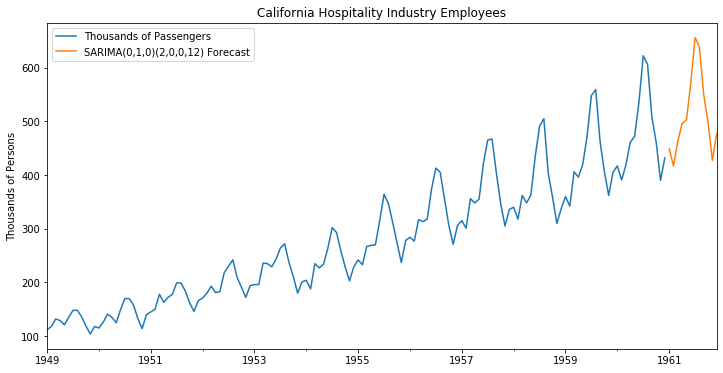

In [62]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = airline['Thousands of Passengers'].plot(legend=True,figsize=(12,6),title=title)
fcast_airline.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [63]:
model = ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

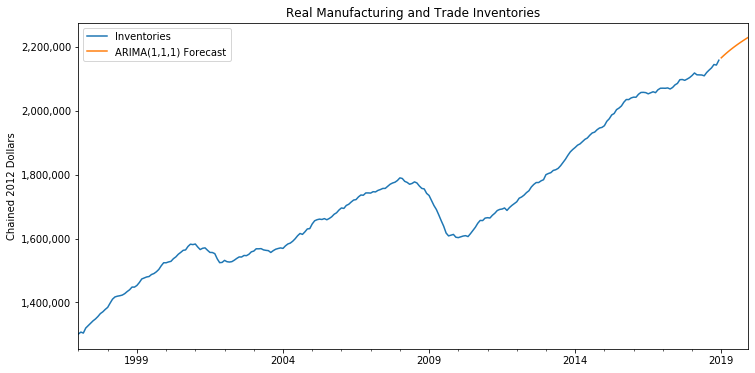

In [64]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [65]:
fcast_airline

1961-01-01    449.196899
1961-02-01    416.857282
1961-03-01    462.962670
1961-04-01    496.167685
1961-05-01    502.494487
1961-06-01    570.225795
1961-07-01    656.155733
1961-08-01    638.067972
1961-09-01    549.140906
1961-10-01    498.666354
1961-11-01    427.110477
1961-12-01    477.132411
Freq: MS, Name: SARIMA(0,1,0)(2,0,0,12) Forecast, dtype: float64